In [3]:
import pandas as pd
import os
import numpy as np
import sklearn.cluster as sk_cluster
import sklearn.preprocessing as sk_preprocessing
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sci_cluster

Ανάγνωση δεδομένων από τα αρχεία harth και ένωση δεδομένων στο dataframe concat.

In [4]:
data_dir = './harth'

concat = pd.DataFrame()
for root, _, files in os.walk(data_dir):
    for file in files:
        new = pd.read_csv(os.path.join(root, file), index_col = 'timestamp')
        file_name = os.path.splitext(file)[0]
        new['file_name'] = file_name
        concat = pd.concat([concat, new])
concat.reset_index(inplace = True)
concat['timestamp'] = pd.to_datetime(concat['timestamp']).apply(lambda x: x.timestamp())
time = concat['timestamp']

Συσταδοποίηση των χρηστών με βάση τον συνολικό αριθμό των δραστηριοτήτων τους, με την χρήση του αλγορίθμου K-means.

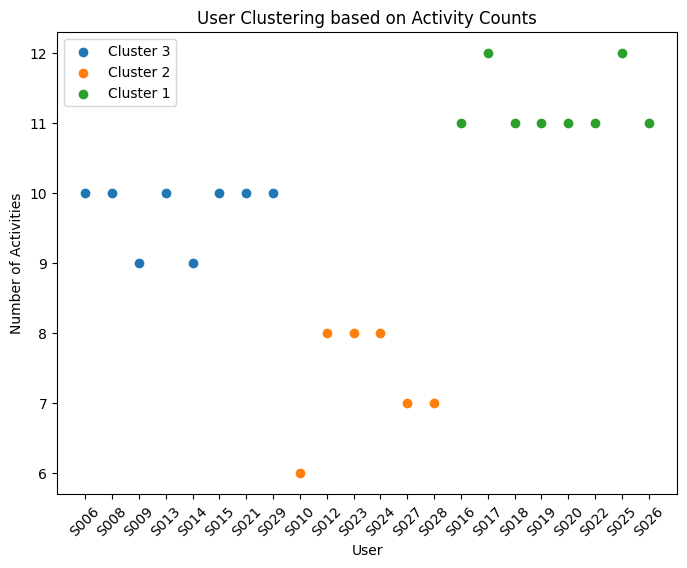

In [5]:
user_activity_counts = concat.groupby('file_name')['label'].nunique().reset_index()

scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(user_activity_counts[['label']])
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
user_activity_counts['cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster_label in user_activity_counts['cluster'].unique():
    cluster_data = user_activity_counts[user_activity_counts['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['label'], label=f'Cluster {cluster_label + 1}')

plt.xlabel('User')
plt.ylabel('Number of Activities')
plt.title('User Clustering based on Activity Counts')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που κάνουν ποδήλατο, με την χρήση του αλγορίθμου K-means.

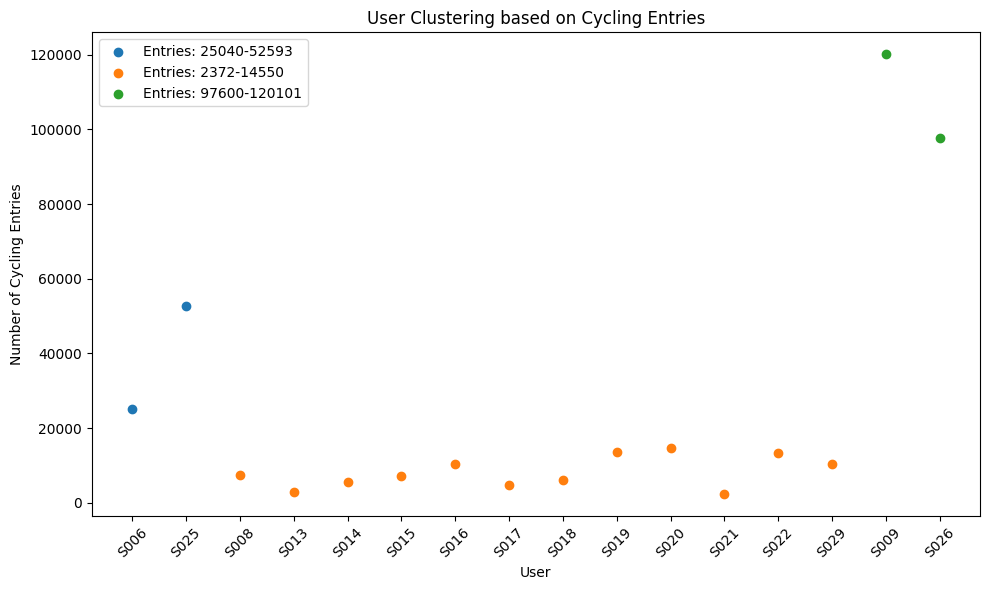

In [6]:
count_cycling = concat[concat['label'] == (13 or 14 or 130 or 140)].groupby('file_name')['label'].count().reset_index()
count_cycling.columns = ['file_name', 'count_cycling']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_cycling[['count_cycling']])

# Perform KMeans clustering
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
count_cycling['cluster'] = kmeans.fit_predict(X)

cluster_limits = count_cycling.groupby('cluster')['count_cycling'].agg(['min', 'max']).reset_index()

# Create a dictionary for cluster labels
cluster_labels = {row['cluster']: f"{row['min']}-{row['max']}" for _, row in cluster_limits.iterrows()}
# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in count_cycling['cluster'].unique():
    cluster_data = count_cycling[count_cycling['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['count_cycling'], label=f'Entries: {cluster_labels[cluster_label]}')

plt.xlabel('User')
plt.ylabel('Number of Cycling Entries')
plt.title('User Clustering based on Cycling Entries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που περπατούν, με την χρήση του αλγορίθμου K-means.

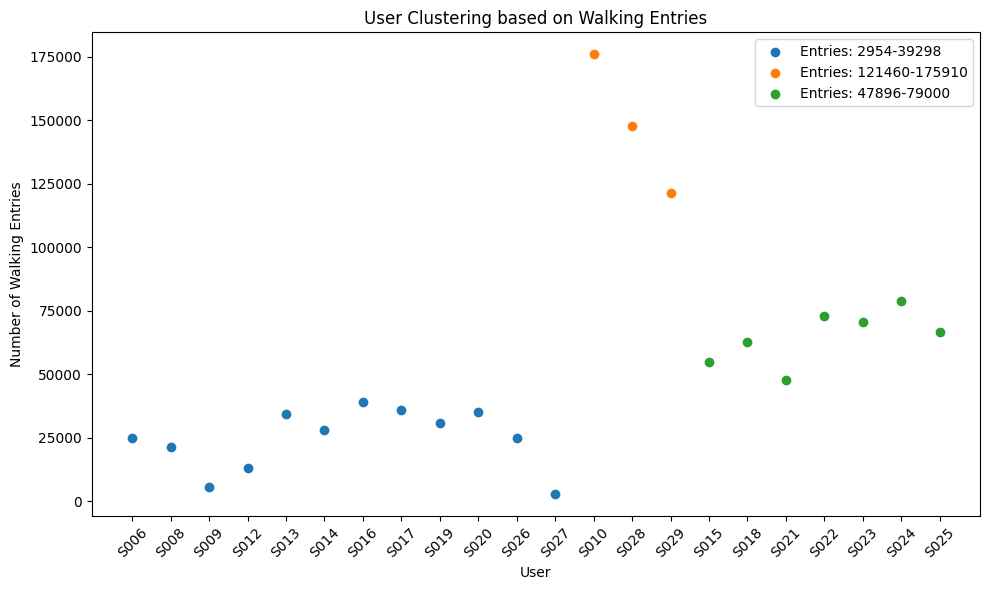

In [7]:
count_walking = concat[concat['label'] == 1].groupby('file_name')['label'].count().reset_index()
count_walking.columns = ['file_name', 'count_walking']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_walking[['count_walking']])

# Perform KMeans clustering
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
count_walking['cluster'] = kmeans.fit_predict(X)

cluster_limits = count_walking.groupby('cluster')['count_walking'].agg(['min', 'max']).reset_index()

# Create a dictionary for cluster labels
cluster_labels = {row['cluster']: f"{row['min']}-{row['max']}" for _, row in cluster_limits.iterrows()}

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in count_walking['cluster'].unique():
    cluster_data = count_walking[count_walking['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['count_walking'], label=f'Entries: {cluster_labels[cluster_label]}')

plt.xlabel('User')
plt.ylabel('Number of Walking Entries')
plt.title('User Clustering based on Walking Entries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που τρέχουν, με την χρήση του αλγορίθμου K-means.

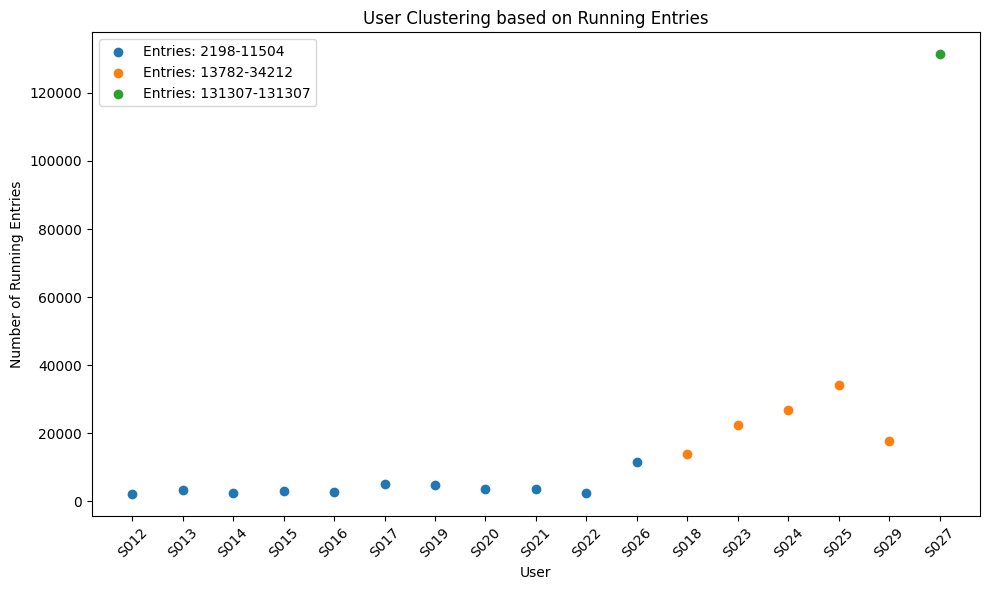

In [8]:
count_running = concat[concat['label'] == 2].groupby('file_name')['label'].count().reset_index()
count_running.columns = ['file_name', 'count_running']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_running[['count_running']])

# Perform KMeans clustering
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
count_running['cluster'] = kmeans.fit_predict(X)

cluster_limits = count_running.groupby('cluster')['count_running'].agg(['min', 'max']).reset_index()

# Create a dictionary for cluster labels
cluster_labels = {row['cluster']: f"{row['min']}-{row['max']}" for _, row in cluster_limits.iterrows()}

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in count_running['cluster'].unique():
    cluster_data = count_running[count_running['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['count_running'], label= f'Entries: {cluster_labels[cluster_label]}')

plt.xlabel('User')
plt.ylabel('Number of Running Entries')
plt.title('User Clustering based on Running Entries')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που είναι ανενεργοί, με την χρήση του αλγορίθμου K-means.

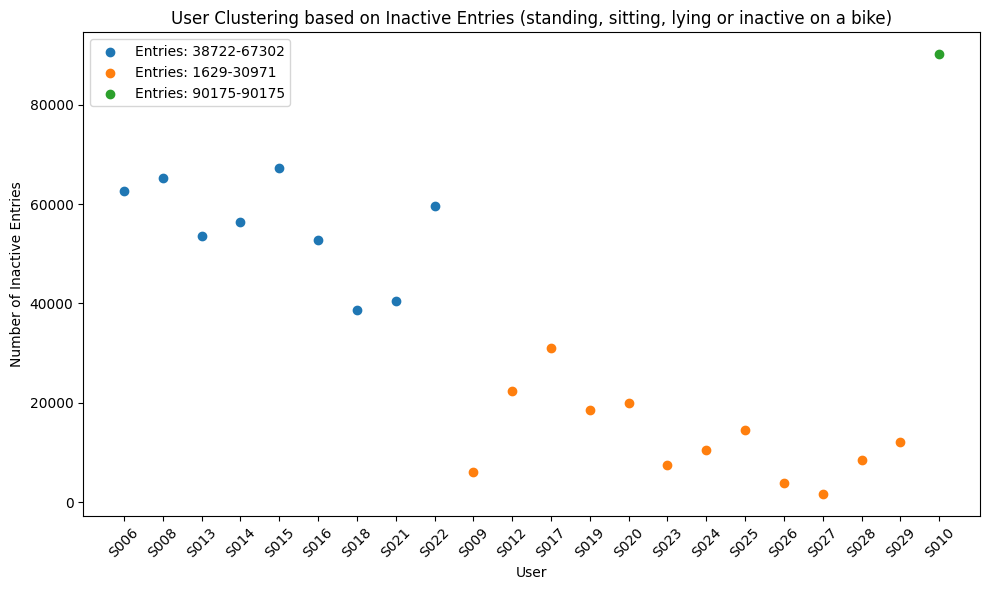

In [15]:
count_inactive = concat[concat['label'] == (6 or 7 or 8 or 130 or 140)].groupby('file_name')['label'].count().reset_index()
count_inactive.columns = ['file_name', 'count_inactive']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_inactive[['count_inactive']])

# Perform KMeans clustering
kmeans = sk_cluster.KMeans(n_clusters=3, random_state=42)
count_inactive['cluster'] = kmeans.fit_predict(X)

cluster_limits = count_inactive.groupby('cluster')['count_inactive'].agg(['min', 'max']).reset_index()

# Create a dictionary for cluster labels
cluster_labels = {row['cluster']: f"{row['min']}-{row['max']}" for _, row in cluster_limits.iterrows()}

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster_label in count_inactive['cluster'].unique():
    cluster_data = count_inactive[count_inactive['cluster'] == cluster_label]
    plt.scatter(cluster_data['file_name'], cluster_data['count_inactive'], label= f'Entries: {cluster_labels[cluster_label]}')

plt.xlabel('User')
plt.ylabel('Number of Inactive Entries')
plt.title('User Clustering based on Inactive Entries (standing, sitting, lying or inactive on a bike)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό αριθμό των δραστηριοτήτων τους, με την χρήση του αλγορίθμου hierarchical clustering.

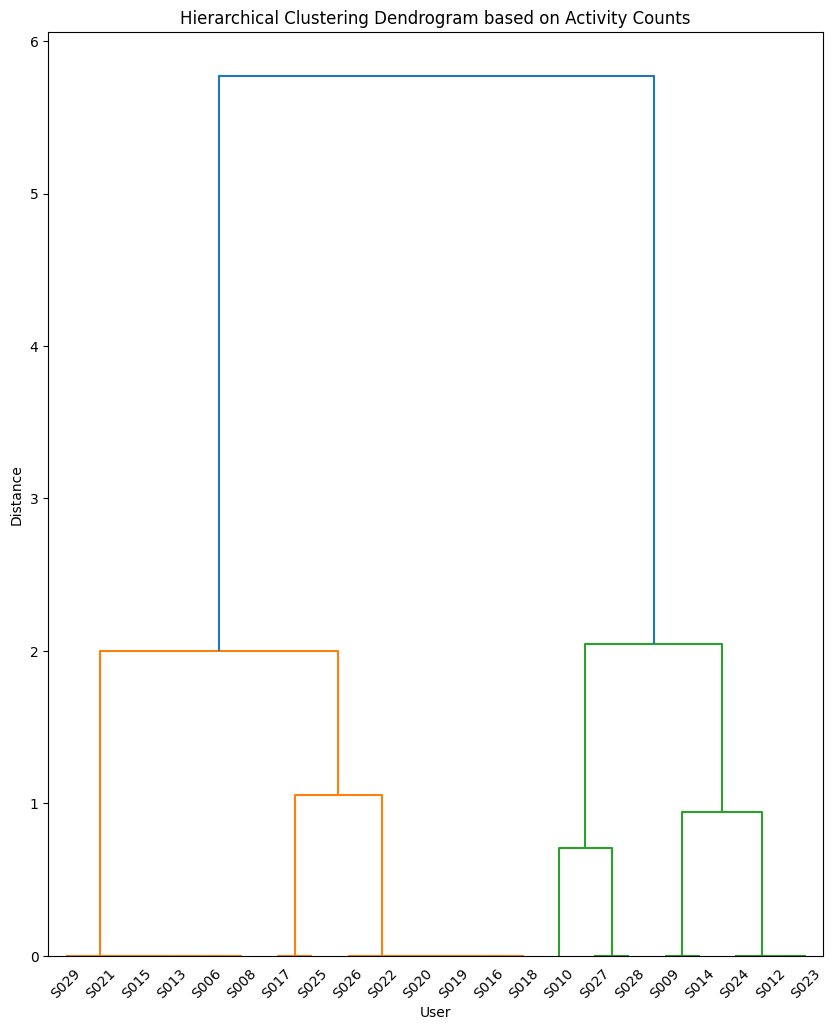

In [9]:
user_activity_counts = concat.groupby('file_name')['label'].nunique().reset_index()
# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(user_activity_counts[['label']])

# Perform hierarchical clustering
model = sk_cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    sci_cluster.dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram based on Activity Counts')
plot_dendrogram(model, labels=user_activity_counts['file_name'].to_numpy(), leaf_rotation=45)
plt.xlabel('User')
plt.ylabel('Distance')
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που κάνουν ποδήλατο, με την χρήση του αλγορίθμου hierarchical clustering.

C:\Users\Thela\AppData\Local\Temp\ipykernel_33460\1223476499.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


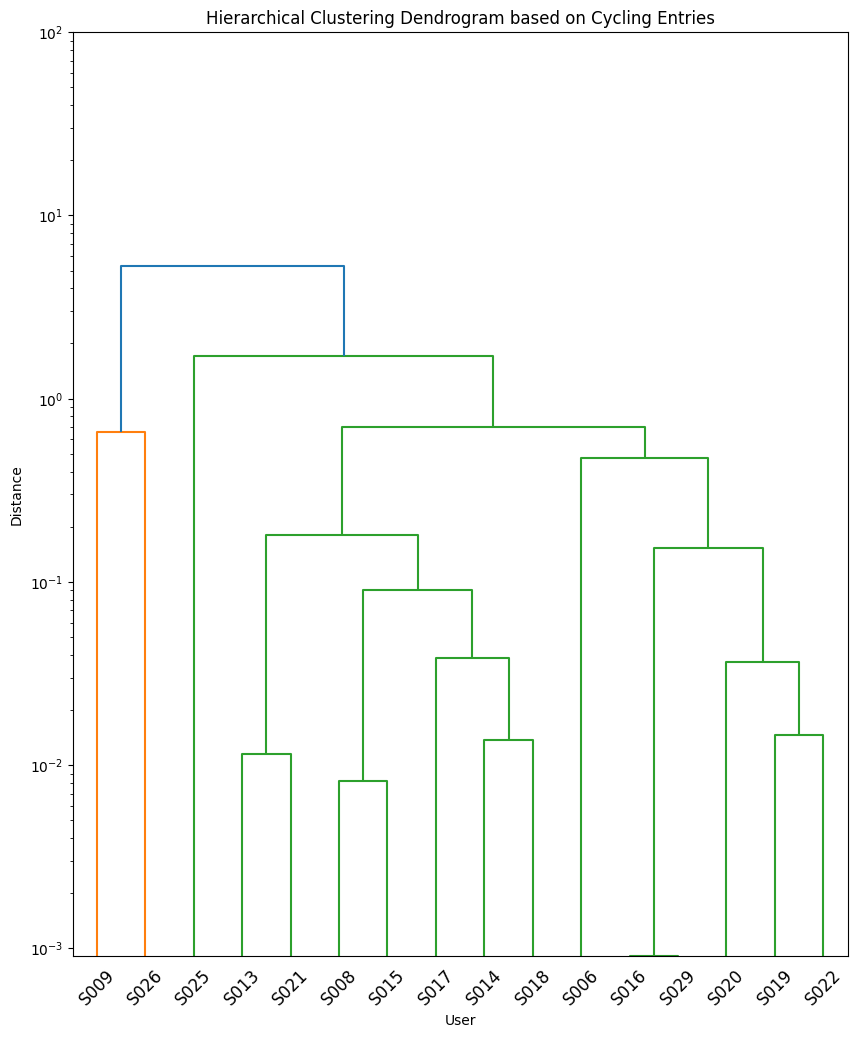

In [10]:
count_cycling = concat[concat['label'] == (13 or 14 or 130 or 140)].groupby('file_name')['label'].count().reset_index()
count_cycling.columns = ['file_name', 'count_cycling']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_cycling[['count_cycling']])

# Perform hierarchical clustering
model = sk_cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    sci_cluster.dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram based on Cycling Entries')
plot_dendrogram(model, labels=count_cycling['file_name'].to_numpy(), leaf_rotation=45)
plt.xlabel('User')
plt.ylabel('Distance')
plt.yscale('log')
plt.ylim(0,100)
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που περπατούν, με την χρήση του αλγορίθμου hierarchical clustering.

C:\Users\Thela\AppData\Local\Temp\ipykernel_33460\1786161999.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


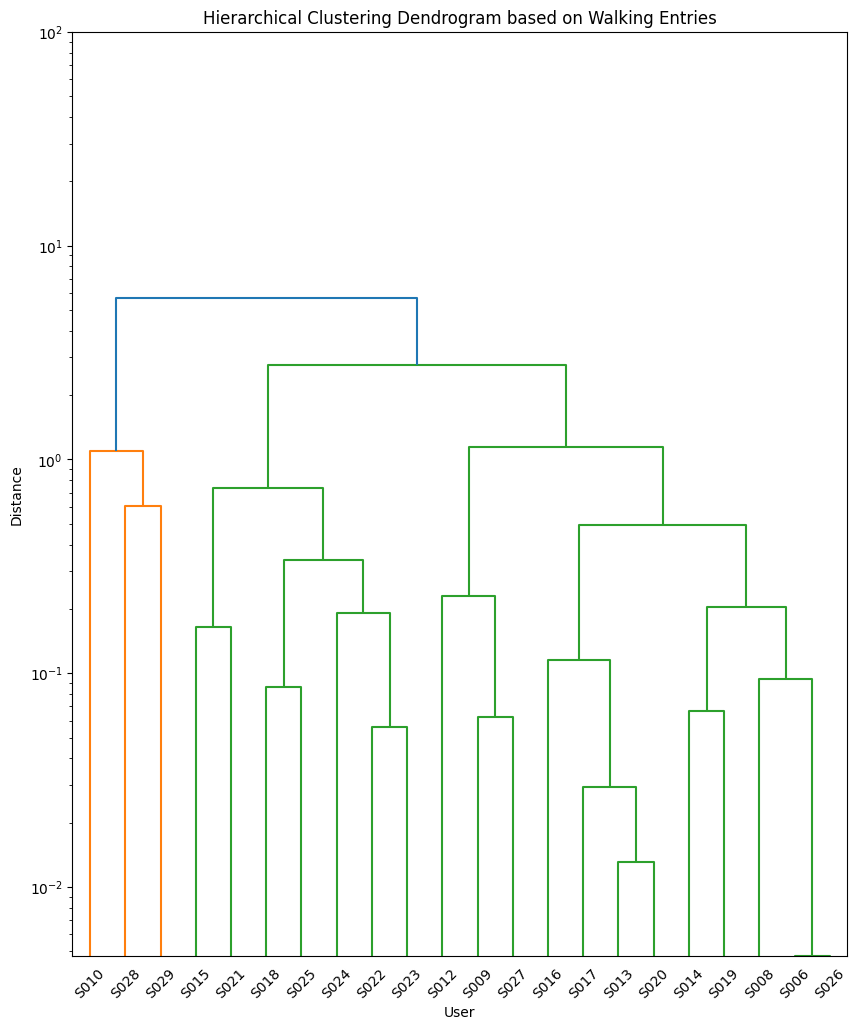

In [11]:
count_walking = concat[concat['label'] == 1].groupby('file_name')['label'].count().reset_index()
count_walking.columns = ['file_name', 'count_walking']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_walking[['count_walking']])

# Perform hierarchical clustering
model = sk_cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    sci_cluster.dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram based on Walking Entries')
plot_dendrogram(model, labels=count_walking['file_name'].to_numpy(), leaf_rotation=45)
plt.xlabel('User')
plt.ylabel('Distance')
plt.yscale('log')
plt.ylim(0,100)
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που τρέχουν, με την χρήση του αλγορίθμου hierarchical clustering.

C:\Users\Thela\AppData\Local\Temp\ipykernel_33460\903229927.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


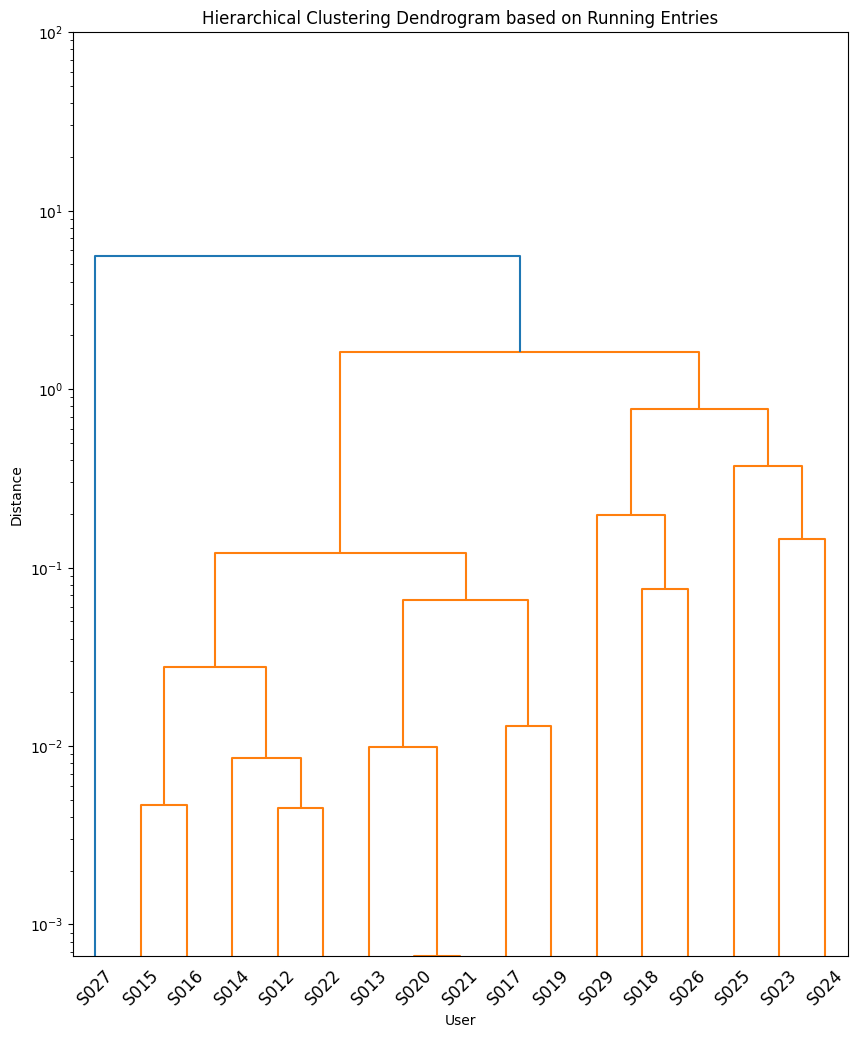

In [12]:
count_running = concat[concat['label'] == 2].groupby('file_name')['label'].count().reset_index()
count_running.columns = ['file_name', 'count_running']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_running[['count_running']])

# Perform hierarchical clustering
model = sk_cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    sci_cluster.dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram based on Running Entries')
plot_dendrogram(model, labels=count_running['file_name'].to_numpy(), leaf_rotation=45)
plt.xlabel('User')
plt.ylabel('Distance')
plt.yscale('log')
plt.ylim(0,100)
plt.show()

Συσταδοποίηση των χρηστών με βάση τον συνολικό χρόνο που είναι ανενεργοί, με την χρήση του αλγορίθμου hierarchical clustering.

C:\Users\Thela\AppData\Local\Temp\ipykernel_33460\716210311.py:37: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,100)


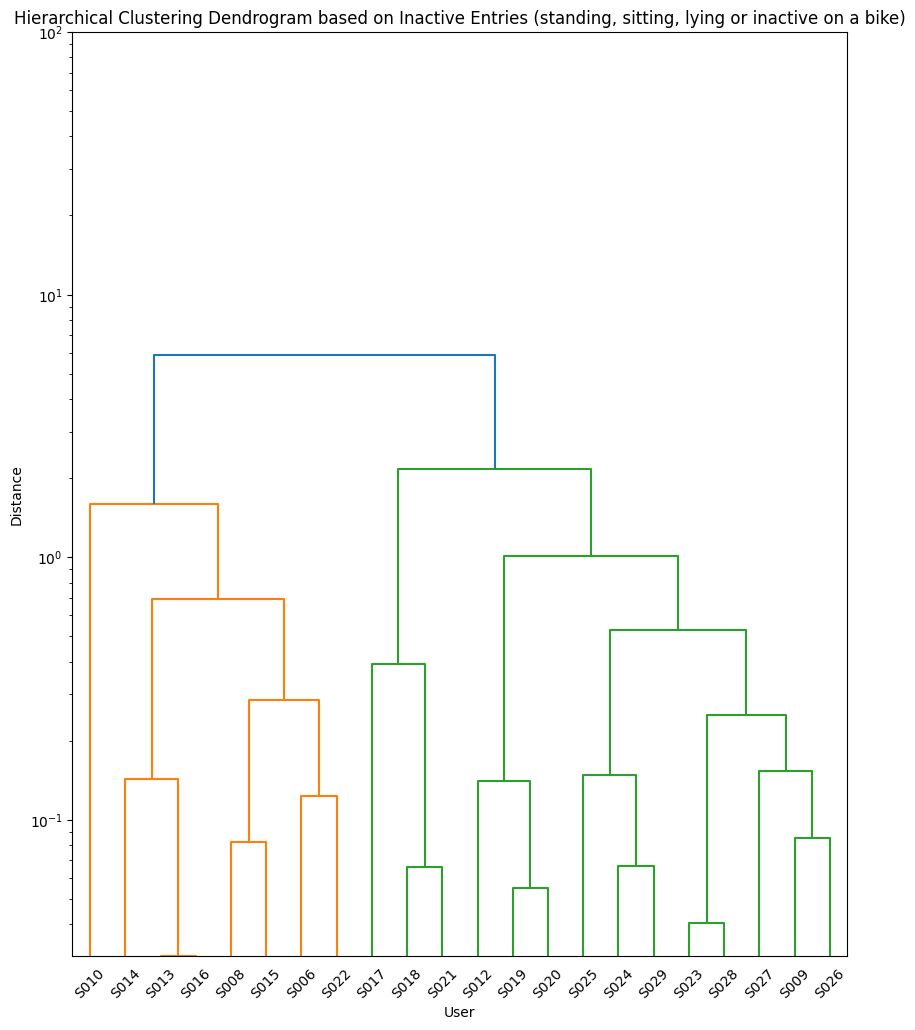

In [13]:
count_inactive = concat[concat['label'] == (6 or 7 or 8 or 130 or 140)].groupby('file_name')['label'].count().reset_index()
count_inactive.columns = ['file_name', 'count_inactive']

# Standardize the count data
scaler = sk_preprocessing.StandardScaler()
X = scaler.fit_transform(count_inactive[['count_inactive']])

# Perform hierarchical clustering
model = sk_cluster.AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # original observation
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the dendrogram
    sci_cluster.dendrogram(linkage_matrix, **kwargs)

# Plot the dendrogram
plt.figure(figsize=(10,12))
plt.title('Hierarchical Clustering Dendrogram based on Inactive Entries (standing, sitting, lying or inactive on a bike)')
plot_dendrogram(model, labels=count_inactive['file_name'].to_numpy(), leaf_rotation=45)
plt.xlabel('User')
plt.ylabel('Distance')
plt.yscale('log')
plt.ylim(0,100)
plt.show()